<a href="https://colab.research.google.com/github/i-rybachok/RybachokMachineLearning/blob/main/%D0%9C%D0%9D_%D0%9B%D0%B0%D0%B16_%D0%A0%D0%B8%D0%B1%D0%B0%D1%87%D0%BE%D0%BA_%D0%A4%D0%86%D0%A24_8_ipynb_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Рибачок Ірина, ФІТ 4-8

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import TargetEncoder, StandardScaler, LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import os

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arunjangir245/boston-housing-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'boston-housing-dataset' dataset.
Path to dataset files: /kaggle/input/boston-housing-dataset


*   crim: Per capita crime rate by town.
*   zn: Proportion of large residential lots (over 25,000 sq. ft.).
*   indus: Proportion of non-retail business acres per town.
*   Chas: Binary variable indicating if the property is near Charles River (1 for yes, 0 for no).
*   nox: Concentration of nitrogen oxides in the air.
*   rm: Average number of rooms per dwelling.
*   age: Proportion of old owner-occupied units built before 1940.
*   dis: Weighted distances to Boston employment centers.
*   rad: Index of accessibility to radial highways.
*   tax: Property tax rate per $10,000.

In [ ]:
df = pd.read_csv(os.path.join(path, "BostonHousing.csv"))
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,5
age,0
dis,0
rad,0
tax,0


In [ ]:
df = df.dropna(subset=['rm'])

In [ ]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,3.647414,11.402196,11.160619,0.069860,0.555151,6.284341,68.513373,3.786423,9.596806,409.143713,18.453493,356.298523,12.643752,22.561277
std,8.637688,23.414214,6.857123,0.255166,0.116186,0.705587,28.212221,2.103327,8.735509,169.021216,2.166327,91.672055,7.162746,9.232435
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081990,0.000000,5.190000,0.000000,0.449000,5.884000,45.000000,2.088200,4.000000,279.000000,17.400000,375.210000,6.920000,17.000000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.182700,5.000000,330.000000,19.000000,391.340000,11.380000,21.200000
75%,3.693110,12.500000,18.100000,0.000000,0.624000,6.625000,94.000000,5.118000,24.000000,666.000000,20.200000,396.230000,16.940000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.value_counts('chas')

,count
chas,
0,466
1,35


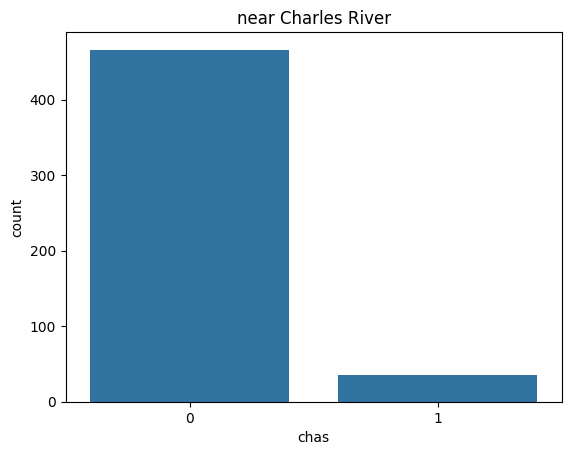

In [ ]:
sns.countplot(x='chas', data=df)
plt.title('near Charles River')
plt.show()

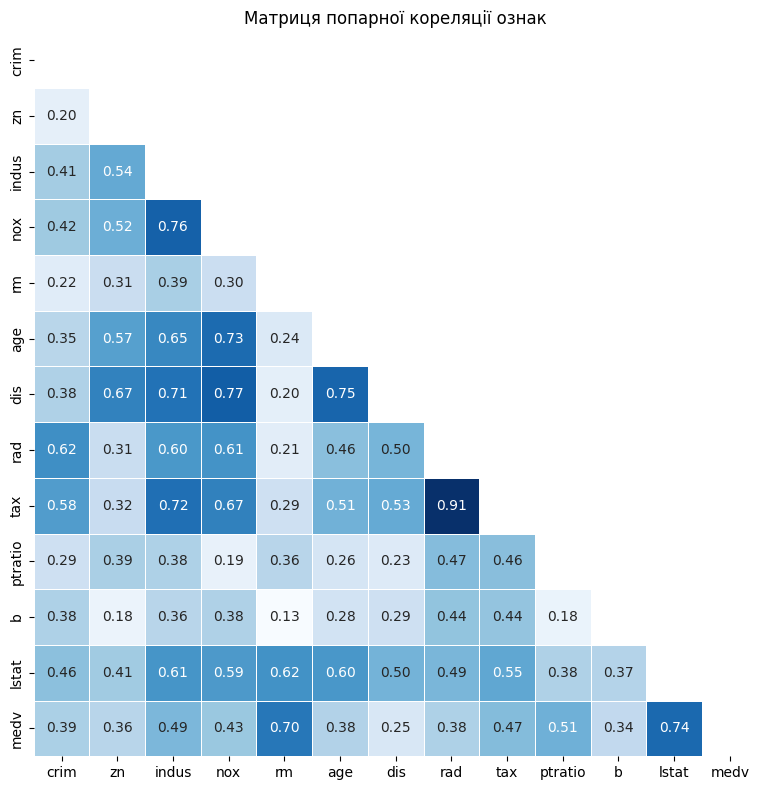

In [ ]:
mtx = df.drop('chas', axis=1).corr(numeric_only=True).abs()

# Побудова графіка
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(
    mtx,
    cmap='Blues',
    annot=True,
    fmt=".2f",
    linewidths=.5,
    mask=np.triu(np.ones_like(mtx, dtype=bool)),  # маскуємо верхню трикутну частину
    square=True,
    cbar=False,
    ax=ax
)

plt.title("Матриця попарної кореляції ознак")
plt.tight_layout()
plt.show()

In [ ]:
corr_pr = df.corr(numeric_only=True)['chas'].abs().sort_values(ascending=False)
corr_pr

,chas
chas,1.000000
medv,0.174679
ptratio,0.121830
dis,0.098696
rm,0.091468
nox,0.090371
age,0.087384
indus,0.062351
crim,0.057032
lstat,0.053698


In [ ]:
X = df.drop('chas', axis=1)
y = df['chas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(class_weight='balanced', random_state=42) # class_weight='balanced' виправляє дисбаланс класів
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 91.09%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        94
           1       0.44      1.00      0.61         7

    accuracy                           0.91       101
   macro avg       0.72      0.95      0.78       101
weighted avg       0.96      0.91      0.93       101



In [ ]:
conf = confusion_matrix(y_test, y_pred)
conf

array([[85,  9],
       [ 0,  7]])

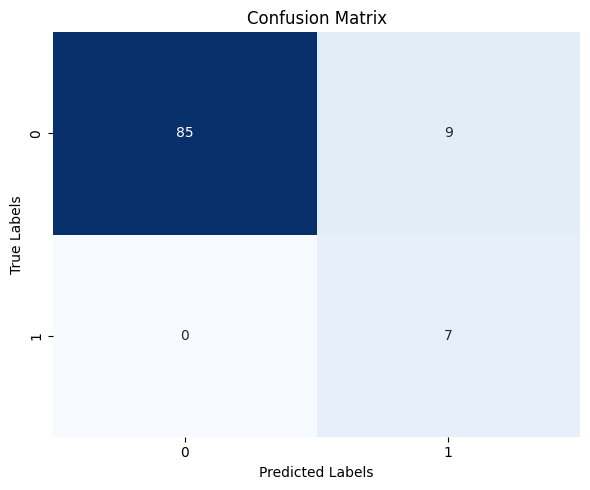

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=True, yticklabels=True)

# Додаємо заголовки
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Показуємо графік
plt.tight_layout()
plt.show()

In [ ]:
# Створюємо датафрейм
comparison_df = pd.DataFrame({
    "True Class": y_test.values,
    "Predicted Class": y_pred
})

# Вибираємо 10 випадкових зразків
random_samples = comparison_df.sample(10, random_state=42)

print("\n10 випадкових зразків:")
print(random_samples)


10 випадкових зразків:
    True Class  Predicted Class
84           0                0
55           0                0
66           0                0
67           0                0
45           0                0
39           0                0
22           0                0
44           0                0
10           0                0
0            0                0


In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # параметр регуляризації
    'solver': ['lbfgs', 'liblinear'],  # алгоритми оптимізації
    'max_iter': [100, 200, 300]  # кількість ітерацій
}

# Для RandomizedSearchCV
param_dist = {
    'solver': ['liblinear', 'lbfgs'],
    'C': np.logspace(-2, 2, 10),
    'max_iter': [200, 500]
}

In [ ]:
grid = GridSearchCV(
    LogisticRegression(class_weight='balanced', random_state=42),
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)
grid.fit(X_train_scaled, y_train)

print("GridSearchCV найкращі параметри:")
print(grid.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
GridSearchCV найкращі параметри:
{'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}


In [ ]:
random_search = RandomizedSearchCV(
    LogisticRegression(class_weight='balanced', random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1,
    random_state=42
)
random_search.fit(X_train_scaled, y_train)

print("RandomizedSearchCV найкращі параметри:")
print(random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
RandomizedSearchCV найкращі параметри:
{'solver': 'lbfgs', 'max_iter': 500, 'C': np.float64(12.915496650148826)}


In [ ]:
best_model = random_search.best_estimator_  # або grid.best_estimator_
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

print(f"\nAccuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 88.12%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        94
           1       0.37      1.00      0.54         7

    accuracy                           0.88       101
   macro avg       0.68      0.94      0.74       101
weighted avg       0.96      0.88      0.90       101



Висновки: точність Accuracy: 88.12%. Вона трохи впала, але все одно висока (що свідчить про високу якість класифікації), і модель теперь справедлива для обох класів. Значення метрик precision, recall та f1-score для класу 0 близькі 0.87 –1.00, тобто модель добре розпізнає клас 0 (якщо будинок НЕ біля річки). А для класу 1 значення метрик нижчі: модель завжди знаходить клас 1 (recall = 1), але іноді передбачає клас 1, коли насправді це 0 (через низький precision). Загалом по зваженому середньому f1-score (який дорівнює 0.90) можна сказати, що модель досить збалансована.

**Завдання 2**

Побудувати метод опорних векторів і дерево рішень. Порівняти результат і вибрати найкращу модель

In [ ]:
# Метод опорних векторів
svm_model = SVC(class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

print("SVM")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm) * 100:.2f}%")
print(classification_report(y_test, y_pred_svm))

SVM
Accuracy: 84.16%
              precision    recall  f1-score   support

           0       0.96      0.86      0.91        94
           1       0.24      0.57      0.33         7

    accuracy                           0.84       101
   macro avg       0.60      0.72      0.62       101
weighted avg       0.91      0.84      0.87       101



In [ ]:
# Дерево рішень
X_train_tree = X_train
X_test_tree = X_test

tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
tree_model.fit(X_train_tree, y_train)

y_pred_tree = tree_model.predict(X_test_tree)

print("Decision Tree")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree) * 100:.2f}%")
print(classification_report(y_test, y_pred_tree))

Decision Tree
Accuracy: 93.07%
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        94
           1       0.50      0.29      0.36         7

    accuracy                           0.93       101
   macro avg       0.72      0.63      0.66       101
weighted avg       0.92      0.93      0.92       101



Висновок:

Accuracy: краще у дерева рішень, але це може бути оманливим показником через дисбаланс класів

precision, recall, f1-score для класу 0: високі значення в обох випадках

Precision для класу 1: SVM - 0.24 - багато хибних позитивних передбачень класу 1,Decision Tree - 0.50 - менше хибних позитивних предбачень. Дерево рішень краще

Recall для класу 1: SVM - 0.57 - модель знаходить більше половини прикладів класу 1, Decision Tree - 0.29 - модель пропускає більшість прикладів класу 1.Метод опорних векторів краще

F1-score для класу 1: дерево рішень трохи краще розпізнає клас 1, але не набагато.

Отже, якщо важливо не пропускати клас 1, метод опорних векторів краще. Якщо пріоритет – точність загальних передбачень та менше хибних позитивних предбачень - дерево рішень краще.